In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from descriptive_tables import *
import missingno as msno
import seaborn as sns

In [2]:
output_path="C:/Users/orlyk/readmissions/project/descriptives/labs/blood_cougalation/"
output_figures="C:/Users/orlyk/readmissions/project/descriptives/labs/blood_cougalation/figures/"

In [3]:
df=pd.read_pickle(r"C:\Users\orlyk\readmissions\project\preprocessed\labs\blood_coagulation\blood_coag_for_model\blood_coag_results_only.pkl")
df_pop=pd.read_pickle(r"C:\Users\orlyk\readmissions\project\preprocessed\population\population_for_model\df_basic_data_short.pkl")

In [4]:
l_casenum=df_pop[["CaseNum","year"]]

df=pd.merge(l_casenum,df,on="CaseNum",how="left")

df=df.sort_values(by='year', ascending=False)
df.shape

(396824, 14)

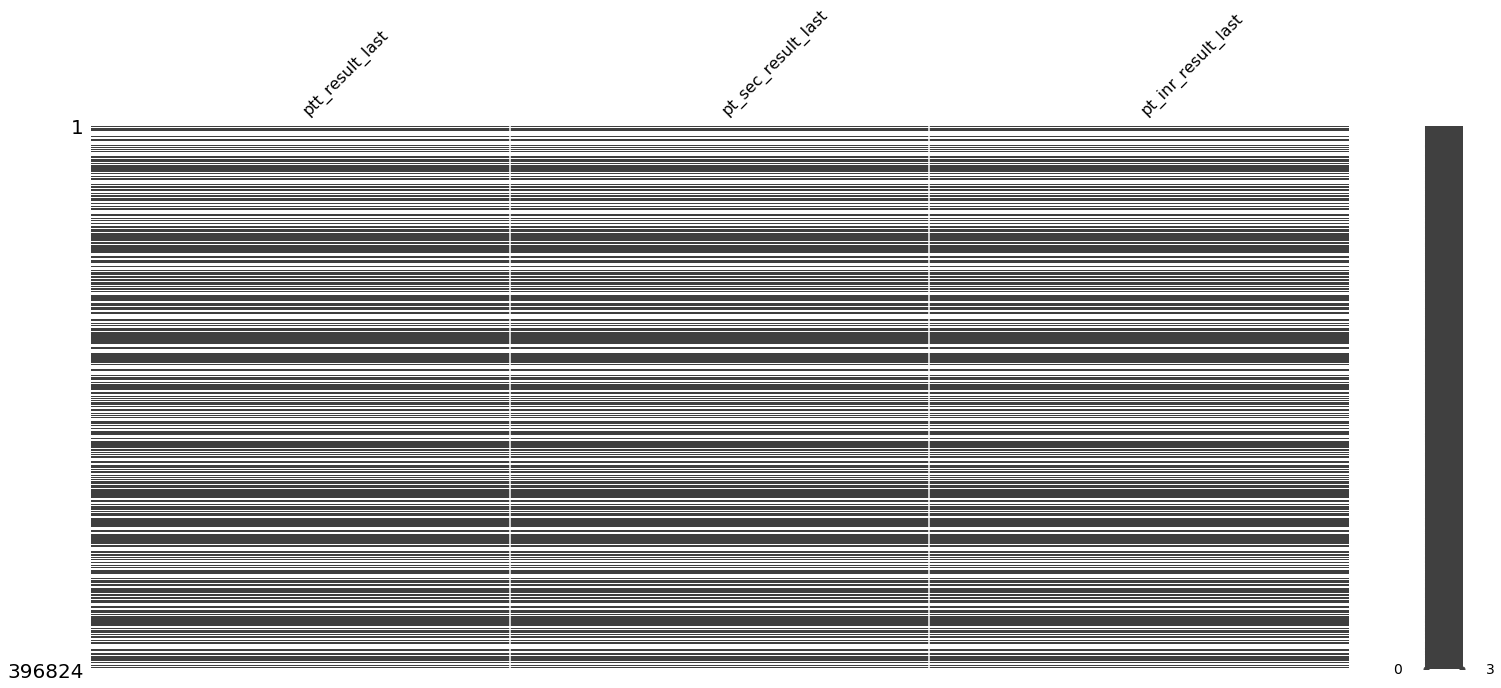

In [5]:
df_last=df.filter(regex='result_last')

a=msno.matrix(df_last)


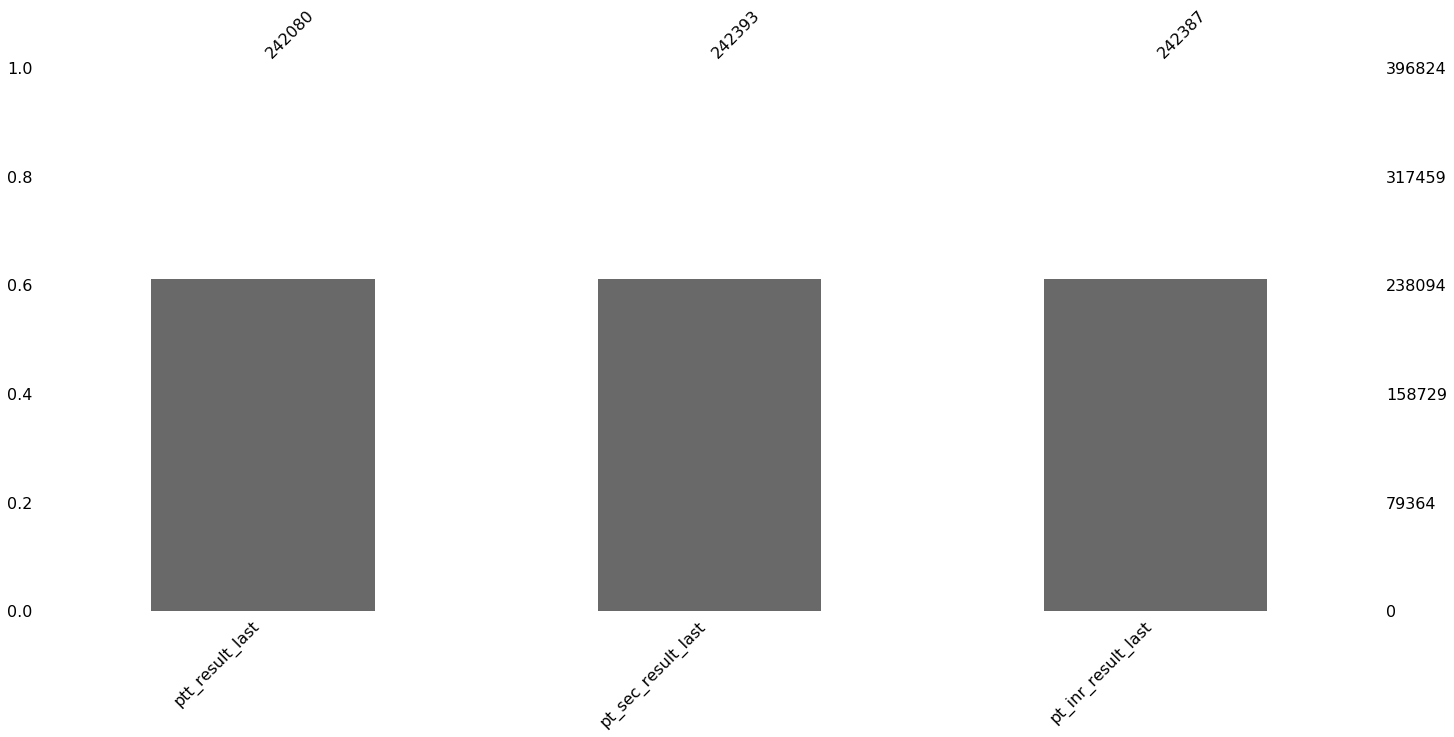

In [6]:
msno.bar(df_last)


In [14]:
df_first=df.filter(regex='result_first')

df_last=pd.concat([df_last, l_casenum], axis=1)
df_last=pd.concat([df_last, df_first], axis=1)

df_last.head(30)

,ptt_result_last,pt_sec_result_last,pt_inr_result_last,CaseNum,year,ptt_result_first,pt_sec_result_first,pt_inr_result_first
0,25.6,11.7,1.03,0010514162,2013,23.5,11.0,1.02
1,NaN,NaN,NaN,0011353581,2017,NaN,NaN,NaN
2,25.1,10.9,1.05,0011817384,2018,25.1,10.9,1.05
3,29.6,10.7,0.97,0002651350,2011,29.6,10.7,0.97
4,39.4,11.0,1.00,0010823787,2014,39.4,11.0,1.00
5,NaN,NaN,NaN,0011377892,2017,NaN,NaN,NaN
6,32.9,12.2,1.11,0011494913,2017,32.9,12.2,1.11
7,NaN,NaN,NaN,0011508428,2017,NaN,NaN,NaN
8,27.5,11.1,1.07,0011824562,2019,27.5,11.1,1.07
9,41.4,10.3,0.98,0011893637,2019,33.0,10.6,1.01


In [17]:


#df_year=df_last.groupby('year').count()
#df_year.head(11)
df_last.columns
df_year=df_last.groupby('year').count()
df_year.head(11)


,ptt_result_last,pt_sec_result_last,pt_inr_result_last,CaseNum,ptt_result_first,pt_sec_result_first,pt_inr_result_first
year,,,,,,,
2011,26384,26413,26413,46128,26384,26413,26413
2012,27038,27074,27072,47659,27038,27074,27072
2013,28407,28439,28439,46630,28407,28439,28439
2014,28596,28630,28631,45900,28596,28630,28631
2015,29687,29724,29724,47444,29687,29724,29724
2016,29633,29683,29679,46592,29633,29683,29679
2017,29091,29136,29136,46573,29091,29136,29136
2018,28909,28937,28937,46074,28909,28937,28937
2019,14335,14357,14356,23824,14335,14357,14356


In [18]:

df_last_short = df_last.dropna(thresh=0.55*len(df_last), axis=1)



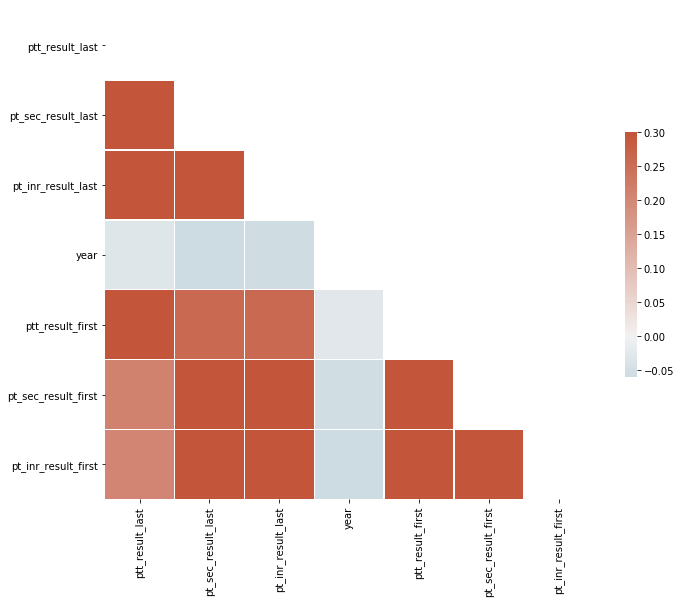

In [19]:
corr = df_last_short.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})